# AlvinApp Smart money mangement Classification 

## Importing libraries

In [2]:
# Dataframe and Plotting libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss


pd.set_option('display.max_columns', None)
# from google.colab import files
import warnings
warnings.filterwarnings('ignore')

## 1. Load the dataset

In [7]:
# Load the files into a Pandas Dataframe
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')


In [8]:
# Let’s observe the shape of our datasets.
print('Train data shape :', train.shape)
print('Test data shape :', test.shape)

Train data shape : (373, 12)
Test data shape : (558, 11)


In [9]:

train.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa
1,2021-10-25 16:18:38.586837+00,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_04xkfb07
2,2022-05-20 14:17:30.917297+00,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,2022-05-27 12:46:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_051urwuw
3,2022-04-12 15:59:14.139347+00,ZILLIONS CREDIT LIMITED,Loan Repayment,3800,2022-02-07 12:16:00+00,False,NaN,Male,5,252000,ID_3JA0MAFB,ID_0e1om7rz
4,2022-05-04 10:24:26.709045+00,MICHAEL MUSEMBI,Bills & Fees,60,2022-05-04 15:28:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0kfcoawb


<BarContainer object of 373 artists>

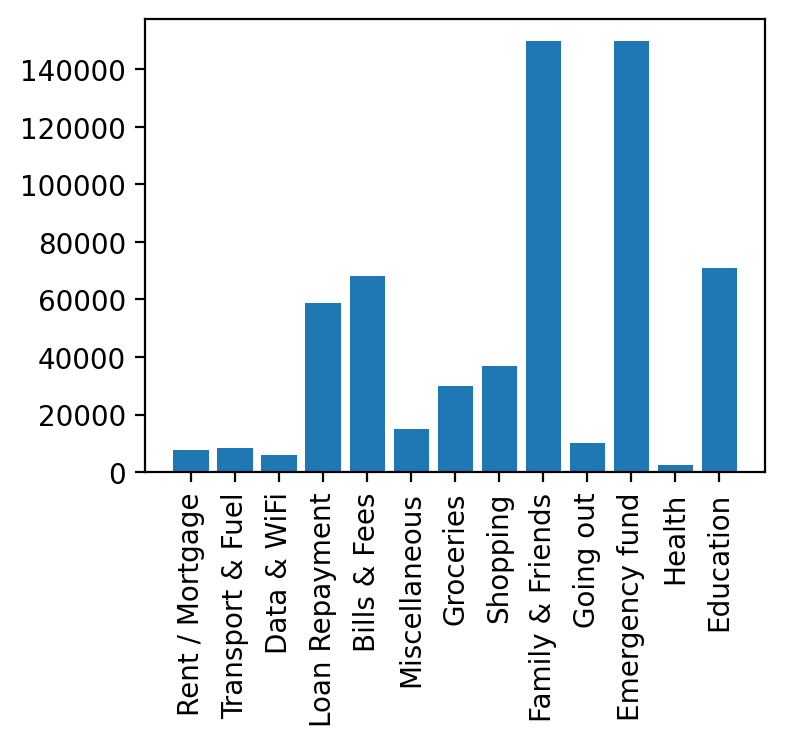

In [10]:
# Show a bar graph of the purchase_value vs the target in the train data (merchant_categorized_as)
plt.figure(dpi=200, figsize=(4,3))
plt.xticks(rotation=90)
plt.bar(data=train, x='MERCHANT_CATEGORIZED_AS', height='PURCHASE_VALUE')

It's interesting to note that more money was spent on education than bills & fees, emergency fund, rent/mortgage and loan repayment.

Also very little was spent on health and transport & fuel.

Encode the target labels to values to show a correlation matrix.

In [11]:
# Use a dictionary comprehension and zip to create a dictionary for all the categories in the train data
labels_train = train['MERCHANT_CATEGORIZED_AS'].astype('category').cat.categories.tolist()
replace_map_train = {'MERCHANT_CATEGORIZED_AS' : {k: v for k,v in zip(labels_train,list(range(1,len(labels_train)+1)))}}
print("Train data: ", replace_map_train)

Train data:  {'MERCHANT_CATEGORIZED_AS': {'Bills & Fees': 1, 'Data & WiFi': 2, 'Education': 3, 'Emergency fund': 4, 'Family & Friends': 5, 'Going out': 6, 'Groceries': 7, 'Health': 8, 'Loan Repayment': 9, 'Miscellaneous': 10, 'Rent / Mortgage': 11, 'Shopping': 12, 'Transport & Fuel': 13}}


In [12]:
# Create a copy to use for the correlation matrix (as it only accepts numerical data)
train_data_corr = train.copy()

In [13]:
# Replace the categories with the numerical equivalents from the dictionary
train_data_corr.replace(replace_map_train, inplace=True)

Correlation matrix

In [14]:
train_data_corr[train_data_corr.columns[1:]].corr()['MERCHANT_CATEGORIZED_AS'][:]

MERCHANT_CATEGORIZED_AS                  1.000000
PURCHASE_VALUE                          -0.074565
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY   -0.086870
USER_AGE                                 0.143406
USER_HOUSEHOLD                          -0.012197
USER_INCOME                              0.041954
Name: MERCHANT_CATEGORIZED_AS, dtype: float64

We can see that not many things are correlated with MERCHANT_CATEGORIZED_AS, so it seems like we don't have enough data.

We need to drop empty rows if there are any.

In [15]:
train.dropna(how='all', inplace=True)
test.dropna(how='all', inplace=True)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MERCHANT_CATEGORIZED_AT                373 non-null    object 
 1   MERCHANT_NAME                          373 non-null    object 
 2   MERCHANT_CATEGORIZED_AS                373 non-null    object 
 3   PURCHASE_VALUE                         373 non-null    int64  
 4   PURCHASED_AT                           373 non-null    object 
 5   IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY  373 non-null    bool   
 6   USER_AGE                               61 non-null     float64
 7   USER_GENDER                            367 non-null    object 
 8   USER_HOUSEHOLD                         373 non-null    int64  
 9   USER_INCOME                            373 non-null    int64  
 10  USER_ID                                373 non-null    object 
 11  Transa

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MERCHANT_CATEGORIZED_AT                558 non-null    object 
 1   MERCHANT_NAME                          558 non-null    object 
 2   PURCHASE_VALUE                         558 non-null    int64  
 3   PURCHASED_AT                           558 non-null    object 
 4   IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY  558 non-null    bool   
 5   USER_AGE                               85 non-null     float64
 6   USER_GENDER                            553 non-null    object 
 7   USER_HOUSEHOLD                         558 non-null    int64  
 8   USER_INCOME                            558 non-null    int64  
 9   USER_ID                                558 non-null    object 
 10  Transaction_ID                         558 non-null    object 
dtypes: boo

We can see that the number of entries in Age for the Test set don't correspond to the rest of its entries and for the Train set there are missing entries for Age and for Gender, which means we have some missing values.

In [18]:
# We can also use the .isnull() method to check for empty values
print('Missing values for Train:', train.isnull().sum())
print('')
print('Missing values for Test:', test.isnull().sum())

Missing values for Train: MERCHANT_CATEGORIZED_AT                    0
MERCHANT_NAME                              0
MERCHANT_CATEGORIZED_AS                    0
PURCHASE_VALUE                             0
PURCHASED_AT                               0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      0
USER_AGE                                 312
USER_GENDER                                6
USER_HOUSEHOLD                             0
USER_INCOME                                0
USER_ID                                    0
Transaction_ID                             0
dtype: int64

Missing values for Test: MERCHANT_CATEGORIZED_AT                    0
MERCHANT_NAME                              0
PURCHASE_VALUE                             0
PURCHASED_AT                               0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      0
USER_AGE                                 473
USER_GENDER                                5
USER_HOUSEHOLD                             0
USER_INCOME                        

There are 4 missing Gender entries and 329 missing Age entries in the train data and 591 missing Age entries for the test data.

In [19]:
train[train['USER_GENDER'].isnull()]

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
35,2021-11-30 10:51:36.702996+00,IDEAL APPLIANCES,Bills & Fees,24995,2021-05-06 14:14:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_3xlptxy6
137,2021-11-30 10:52:38.553994+00,QUICK MART,Shopping,3298,2021-06-19 15:05:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_dhp3d403
280,2021-08-06 11:28:03.723042+00,EQUITY PAYBILL,Shopping,4000,2021-07-25 10:54:00+00,True,NaN,NaN,1,10000,ID_R4T8Q46J,ID_qvgzrt0r
309,2021-11-30 10:52:38.553994+00,NAOMI WANJOHI,Family & Friends,1028,2021-05-13 14:28:00+00,True,NaN,NaN,1,10000,ID_R4T8Q46J,ID_u02b0hl6
312,2021-11-30 10:51:36.702996+00,POA,Data & WiFi,1500,2021-07-21 17:46:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_uvhgthza
361,2021-11-30 10:51:36.702996+00,MIRIAM MUNGAI,Family & Friends,1600,2021-06-11 18:25:00+00,True,NaN,NaN,1,10000,ID_R4T8Q46J,ID_yxz5etfz


In [20]:
test[test['USER_GENDER'].isnull()]

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
124,2021-08-06 11:28:16.857538+00,ACCESS AFYA,1,2021-08-05 09:32:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_8oyhw5j0
138,2021-11-30 10:51:36.702996+00,PETER INDIMULI,1028,2021-04-08 12:07:00+00,True,NaN,NaN,1,10000,ID_R4T8Q46J,ID_9au0g3qv
374,2021-11-30 10:51:36.702996+00,MICHELLE RODROT,827,2021-07-22 13:36:00+00,True,NaN,NaN,1,10000,ID_R4T8Q46J,ID_p5ajidvp
395,2021-11-30 10:51:36.702996+00,DORCAS WANJOHI,2600,2021-06-07 14:05:00+00,True,NaN,NaN,1,10000,ID_R4T8Q46J,ID_qd7dgqor
550,2021-11-30 10:52:38.553994+00,POA,1500,2021-05-22 19:11:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_zqi8lti6


In [21]:
train.USER_GENDER.value_counts()

Male      197
Female    170
Name: USER_GENDER, dtype: int64

In [22]:
test.USER_GENDER.value_counts()

Male      307
Female    246
Name: USER_GENDER, dtype: int64

In [23]:
train["USER_GENDER"] = train["USER_GENDER"].apply(lambda x: "Male" if pd.isna(x) else x)
test["USER_GENDER"] = test["USER_GENDER"].apply(lambda x: "Male" if pd.isna(x) else x)

Let's see how this affected our shape

In [24]:
train.shape

(373, 12)

We have various options with regards to filling in the missing values for AGE.
Let's impute these values with the median

In [25]:
# Impute the missing age entries with the median of that column
train_median_value = np.median(train['USER_AGE'].dropna())
train['USER_AGE'] = train['USER_AGE'].fillna(train_median_value)

test_median_value = np.median(test['USER_AGE'].dropna())
test['USER_AGE'] = test['USER_AGE'].fillna(test_median_value)

In [26]:
# Check that it's done
train.isna().sum()

MERCHANT_CATEGORIZED_AT                  0
MERCHANT_NAME                            0
MERCHANT_CATEGORIZED_AS                  0
PURCHASE_VALUE                           0
PURCHASED_AT                             0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY    0
USER_AGE                                 0
USER_GENDER                              0
USER_HOUSEHOLD                           0
USER_INCOME                              0
USER_ID                                  0
Transaction_ID                           0
dtype: int64

In [27]:
test.isna().sum()

MERCHANT_CATEGORIZED_AT                  0
MERCHANT_NAME                            0
PURCHASE_VALUE                           0
PURCHASED_AT                             0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY    0
USER_AGE                                 0
USER_GENDER                              0
USER_HOUSEHOLD                           0
USER_INCOME                              0
USER_ID                                  0
Transaction_ID                           0
dtype: int64

### One-hot encode

In [28]:
train["train"] = 1
test["train"] = 0

In [29]:
all_data = pd.concat([train, test])

In [30]:
all_data = pd.get_dummies(all_data, prefix_sep="_", columns=['MERCHANT_NAME'])

Let's see how this affected the shapes

In [31]:
train = all_data[all_data["train"] == 1]
test = all_data[all_data["train"] == 0]

In [32]:
print("Train: ", train.shape)
print("Test: ", test.shape)

Train:  (373, 452)
Test:  (558, 452)


### Drop unnecessary columns

In [33]:
train = train.drop(['MERCHANT_CATEGORIZED_AT','PURCHASED_AT','USER_ID', 'Transaction_ID', "train"], axis=1)
test = test.drop(['MERCHANT_CATEGORIZED_AT','PURCHASED_AT','USER_ID', "train", "MERCHANT_CATEGORIZED_AS"], axis=1)

### Convert Boolean to Binary

Now we convert boolean entries to binary.

In [34]:
# Based on our data set, this function converts boolean to binary entries
def create_binary_cols(content):
  if content == False:
    content = 0
  elif content == True:
    content = 1
  elif content == 'N':
    content = 0
  elif content == 'Y':
    content = 1
  elif content == 'Male':
    content = 0
  elif content == 'Female':
    content = 1
  return content

In [35]:
# Gender column convert:
train['USER_GENDER'] = train['USER_GENDER'].apply(create_binary_cols)
test['USER_GENDER'] = test['USER_GENDER'].apply(create_binary_cols)

# Is_purchase_paid_via_mpesa_send_money column convert:
train['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'] = train['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'].apply(create_binary_cols)
test['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'] = test['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'].apply(create_binary_cols)

## 3. Data preparation for machine learning




In [36]:
# Separate the features from the target in the training data
X = train.drop(["MERCHANT_CATEGORIZED_AS"], axis=1)
y = train["MERCHANT_CATEGORIZED_AS"]

In [37]:
y.unique()

array(['Rent / Mortgage', 'Transport & Fuel', 'Data & WiFi',
       'Loan Repayment', 'Bills & Fees', 'Miscellaneous', 'Groceries',
       'Shopping', 'Family & Friends', 'Going out', 'Emergency fund',
       'Health', 'Education'], dtype=object)

In [38]:
X.shape

(373, 446)

In [39]:
# # Split the training data

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=101)

Fit models

Let's try a decision tree first

In [40]:
# Creating a Decision tree classifier
model_dtree = DecisionTreeClassifier(max_depth=5, random_state=101,
                                     max_features = None, min_samples_leaf=8)

# Training the model on the training dataset
model_dtree.fit(X_train, y_train)

# Predict
y_pred = model_dtree.predict(X_val)

# Calculate accuracy
print("ACCURACY OF THE MODEL: ", accuracy_score(y_val, y_pred))

# Classification report
print(classification_report(y_val, y_pred))

ACCURACY OF THE MODEL:  0.34210526315789475
                  precision    recall  f1-score   support

    Bills & Fees       0.36      0.67      0.47         6
     Data & WiFi       1.00      0.50      0.67         4
Family & Friends       0.00      0.00      0.00         6
       Going out       0.29      0.50      0.36         4
       Groceries       0.28      0.83      0.42         6
          Health       0.00      0.00      0.00         1
   Miscellaneous       0.00      0.00      0.00         4
        Shopping       0.00      0.00      0.00         3
Transport & Fuel       0.00      0.00      0.00         4

        accuracy                           0.34        38
       macro avg       0.21      0.28      0.21        38
    weighted avg       0.24      0.34      0.25        38



Let's try random forest with 100 estimators

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Creating a RF classifier
clf = RandomForestClassifier() 
 
# Training the model on the training dataset
clf.fit(X_train, y_train)
 
# Performing predictions on the test dataset
y_pred = clf.predict(X_val)

# Calculate accuracy
print("ACCURACY OF THE MODEL: ", accuracy_score(y_val, y_pred))

# Classification report
print(classification_report(y_val, y_pred))


ACCURACY OF THE MODEL:  0.5
                  precision    recall  f1-score   support

    Bills & Fees       0.45      0.71      0.56         7
     Data & WiFi       1.00      0.50      0.67         2
  Emergency fund       0.00      0.00      0.00         1
Family & Friends       0.86      0.75      0.80         8
       Going out       0.14      1.00      0.25         1
       Groceries       0.50      0.75      0.60         4
   Miscellaneous       0.50      0.17      0.25         6
        Shopping       1.00      0.50      0.67         2
Transport & Fuel       0.33      0.14      0.20         7

        accuracy                           0.50        38
       macro avg       0.53      0.50      0.44        38
    weighted avg       0.57      0.50      0.49        38

